# 电影评论分类：二分类问题

In [1]:
from keras.datasets import imdb

num_words=10000的意思是仅保留训练数据中前10000个最常出现的单词，低频词汇会被舍弃。

In [2]:
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/envs/nlp/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/anaconda3/envs/nlp/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_label[0]

1

In [7]:
max(max(x) for x in train_data)

9999

In [8]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [9]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [10]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

将文本转为张量的方法：
1. 填充列表：使其具有相同的长度，再将列表转换成形状为(samples, word_indeices)的整数张量，然后网络第一层使用能处理这种整数张量的层。
2. 对列表进行one-hot编码：将其转换为0和1组成的向量，举例序列[3, 5]会被转换为10000维向量，其中只有索引3和5为1，其余元素都为0。网络第一层可以用Dense层，他可以处理浮点数向量数据。

In [13]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1.
    return result

In [14]:
train_x = vectorize_sequences(train_data)
train_x

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [25]:
test_x = vectorize_sequences(test_data)
train_y = np.asarray(train_label).astype('float32')
train_y

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [26]:
test_y = np.asarray(test_label).astype('float32')
test_y

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

# 构建网络

In [17]:
from keras import models
from keras import layers

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
val_x = train_x[:10000]
partial_x = train_x[10000:]
val_y = train_y[:10000]
partial_y = train_y[10000:]

In [28]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x, partial_y, epochs=20, batch_size=512, validation_data=(val_x, val_y))

Epoch 1/20
30/30 [==============================] - 3s 70ms/step - loss: 0.6134 - acc: 0.7002 - val_loss: 0.4172 - val_acc: 0.8688
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3535 - acc: 0.8985 - val_loss: 0.3234 - val_acc: 0.8807
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2492 - acc: 0.9242 - val_loss: 0.2817 - val_acc: 0.8924
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1952 - acc: 0.9383 - val_loss: 0.2723 - val_acc: 0.8922
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1550 - acc: 0.9521 - val_loss: 0.2799 - val_acc: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1223 - acc: 0.9623 - val_loss: 0.2869 - val_acc: 0.8879
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1074 - acc: 0.9676 - val_loss: 0.3161 - val_acc: 0.8833
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0891 - a

In [29]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

# 绘制训练损失和验证损失

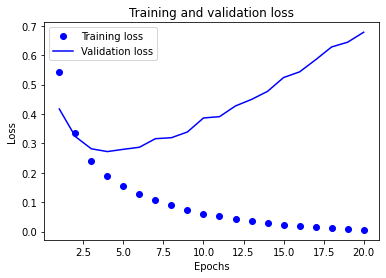

In [31]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')  # 'bo'表示蓝色圆点
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  # 'b'表示蓝色实线
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

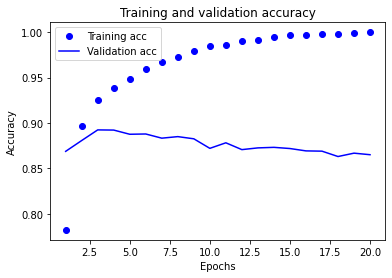

In [32]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

训练损失每一轮都在降低，训练精度每一轮都在提升，这就是梯度下降优化的结果。  
但验证损失和验证精度并非如此，似乎在第五轮之后开始显著下降，也就是过拟合(overfit)  

# 从头开始重新训练一个模型

In [34]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_x, train_y, epochs=4, batch_size=512)
result = model.evaluate(test_x, test_y)

Epoch 1/4
49/49 [==============================] - 2s 20ms/step - loss: 0.5787 - accuracy: 0.7452
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.3001 - accuracy: 0.9077
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2150 - accuracy: 0.9259
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.2918 - accuracy: 0.8844


In [35]:
result

[0.2917605936527252, 0.8844000101089478]

In [36]:
model.predict(test_x)

array([[0.2643562 ],
       [0.9996511 ],
       [0.9399786 ],
       ...,
       [0.13657588],
       [0.12650692],
       [0.755746  ]], dtype=float32)

# 新闻多分类任务

In [1]:
from keras.datasets import reuters

In [2]:
(train_data, train_label), (test_data, test_label) = reuters.load_data(num_words=10000)

/opt/anaconda3/envs/nlp/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/anaconda3/envs/nlp/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
print(len(train_data))
print(len(test_data))

8982
2246


In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])  # 减去3是因为0、1、2为padding、start of sequence、unknown

In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
# 将标签向量化为one-hot形式编码
def to_one_hot(labels, dimensions=46):
    result = np.zeros((len(labels), dimensions))
    for i, label in enumerate(labels):
        result[i, label] = 1
    return result

one_hot_train_labels = to_one_hot(train_label)
one_hot_test_labels = to_one_hot(test_label)

In [9]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_label)
one_hot_test_labels = to_categorical(test_label)

## 构建模型

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
x_val = x_train[:1000]  # 验证集data
partial_x_train = x_train[1000:]  # 训练集data

y_val = one_hot_train_labels[:1000]  # 验证集label
partial_y_train = one_hot_train_labels[1000:]  # 训练集label

In [12]:
print(x_val.shape)
print(partial_x_train.shape)

print(y_val.shape)
print(partial_y_train.shape)

(1000, 10000)
(7982, 10000)
(1000, 46)
(7982, 46)


In [13]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 73ms/step - loss: 3.2247 - accuracy: 0.3602 - val_loss: 1.8038 - val_accuracy: 0.6600
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.5549 - accuracy: 0.6998 - val_loss: 1.3158 - val_accuracy: 0.7260
Epoch 3/20
16/16 [==============================] - 1s 41ms/step - loss: 1.1055 - accuracy: 0.7675 - val_loss: 1.1513 - val_accuracy: 0.7500
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8751 - accuracy: 0.8124 - val_loss: 1.0438 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6820 - accuracy: 0.8581 - val_loss: 0.9777 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 1s 33ms/step - loss: 0.5447 - accuracy: 0.8870 - val_loss: 0.9239 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 1s 30ms/step - loss: 0.4325 - accuracy: 0.9127 - val_loss: 0.8822 - val_accuracy: 0.8160
Epoch 8/20
16

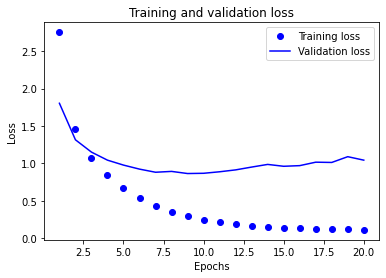

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

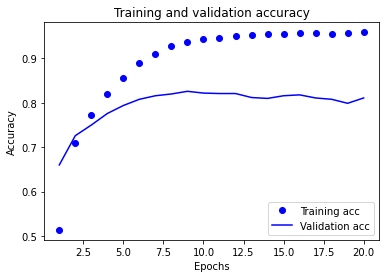

In [18]:
# 精度
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

搞一个新模型

In [20]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 48ms/step - loss: 3.2179 - accuracy: 0.3694 - val_loss: 1.7818 - val_accuracy: 0.6480
Epoch 2/9
16/16 [==============================] - 0s 31ms/step - loss: 1.5303 - accuracy: 0.7031 - val_loss: 1.2878 - val_accuracy: 0.7300
Epoch 3/9
16/16 [==============================] - 1s 40ms/step - loss: 1.0759 - accuracy: 0.7757 - val_loss: 1.1084 - val_accuracy: 0.7650
Epoch 4/9
16/16 [==============================] - 1s 33ms/step - loss: 0.7906 - accuracy: 0.8319 - val_loss: 1.0194 - val_accuracy: 0.7790
Epoch 5/9
16/16 [==============================] - 1s 32ms/step - loss: 0.6405 - accuracy: 0.8625 - val_loss: 0.9537 - val_accuracy: 0.7970
Epoch 6/9
16/16 [==============================] - 1s 31ms/step - loss: 0.5068 - accuracy: 0.8955 - val_loss: 0.9208 - val_accuracy: 0.7990
Epoch 7/9
16/16 [==============================] - 1s 36ms/step - loss: 0.4253 - accuracy: 0.9139 - val_loss: 0.9062 - val_accuracy: 0.8070
Epoch 8/9
16/16 [===

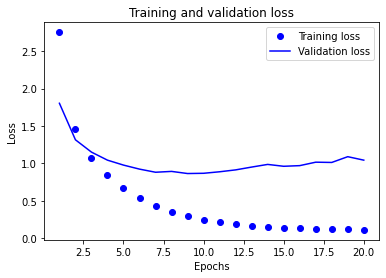

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

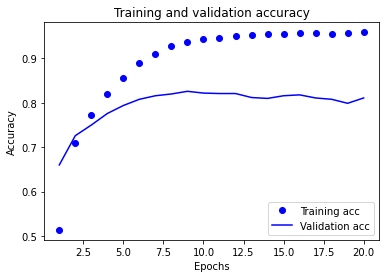

In [22]:
# 精度
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [24]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 1.0000 - accuracy: 0.7841


In [25]:
results

[1.0000380277633667, 0.784060537815094]

可以得到约80%的精度

在新数据上生成预测结果

In [27]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [28]:
np.sum(predictions[0])

0.9999998

In [30]:
np.argmax(predictions[0])

3

# 波士顿房价预测

In [32]:
from keras.datasets import boston_housing

In [33]:
(train_data, train_target), (test_data, test_target) = boston_housing.load_data()

In [34]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [35]:
train_target

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

## 数据取值差异很大，学习困难，做标准化

In [36]:
mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

构建模型

In [37]:
from keras import models
from keras import layers

In [45]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

最后一层只有一个单元，没有激活，是一个线性层，为标量回归的典型设置。若添加激活函数会限制输出范围  
编译网络用的是mse损失函数，即均方误差(MSE, mean squared error)，为预测值与目标值之差的平方，为回归问题常用的损失函数  
平均绝对误差(MAE, mean absolute error)，为预测值与目标值之差的绝对值。

## 利用K折验证来验证参数
用于数据量不多的时候

In [49]:
import numpy as np

k = 4  # k一般设置4或5
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_target = train_target[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_target = np.concatenate(
        [train_target[:i * num_val_samples],
        train_target[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_target,
             epochs=num_epochs, batch_size=1, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_target, verbose=1)
    all_scores.append(val_mae)

processing fold # 0
Epoch 1/100
303/303 [==============================] - 1s 1ms/step - loss: 414.7089 - mae: 17.2944: 0s - loss: 498.2424 - mae:
Epoch 2/100
303/303 [==============================] - 0s 1ms/step - loss: 28.6159 - mae: 4.0788
Epoch 3/100
303/303 [==============================] - 0s 1ms/step - loss: 27.0453 - mae: 3.4971
Epoch 4/100
303/303 [==============================] - 0s 911us/step - loss: 19.0054 - mae: 2.8881
Epoch 5/100
303/303 [==============================] - 0s 1ms/step - loss: 16.8260 - mae: 2.5315
Epoch 6/100
303/303 [==============================] - 0s 1ms/step - loss: 14.1857 - mae: 2.7630
Epoch 7/100
303/303 [==============================] - 0s 1ms/step - loss: 10.5596 - mae: 2.3671
Epoch 8/100
303/303 [==============================] - 0s 1ms/step - loss: 21.5131 - mae: 2.6967
Epoch 9/100
303/303 [==============================] - 0s 998us/step - loss: 13.8431 - mae: 2.4930
Epoch 10/100
303/303 [==============================] - 0s 1ms/step - los

303/303 [==============================] - 0s 985us/step - loss: 3.7228 - mae: 1.3605
Epoch 85/100
303/303 [==============================] - 0s 841us/step - loss: 3.4303 - mae: 1.2617
Epoch 86/100
303/303 [==============================] - 0s 1ms/step - loss: 5.3213 - mae: 1.4954
Epoch 87/100
303/303 [==============================] - 0s 903us/step - loss: 6.4418 - mae: 1.5800
Epoch 88/100
303/303 [==============================] - 0s 838us/step - loss: 4.2043 - mae: 1.4829
Epoch 89/100
303/303 [==============================] - 0s 1ms/step - loss: 4.9368 - mae: 1.4953
Epoch 90/100
303/303 [==============================] - 0s 1ms/step - loss: 5.7466 - mae: 1.5392
Epoch 91/100
303/303 [==============================] - 0s 1ms/step - loss: 3.6798 - mae: 1.3783
Epoch 92/100
303/303 [==============================] - 0s 1ms/step - loss: 3.0668 - mae: 1.2460
Epoch 93/100
303/303 [==============================] - 0s 1ms/step - loss: 3.1116 - mae: 1.2640A: 0s - loss: 2.4984 - mae: 1.
Epoch

303/303 [==============================] - 0s 982us/step - loss: 4.2677 - mae: 1.3910
Epoch 67/100
303/303 [==============================] - 0s 995us/step - loss: 3.4531 - mae: 1.2816
Epoch 68/100
303/303 [==============================] - 0s 959us/step - loss: 6.1279 - mae: 1.6372
Epoch 69/100
303/303 [==============================] - 1s 2ms/step - loss: 4.1370 - mae: 1.4389
Epoch 70/100
303/303 [==============================] - 0s 1ms/step - loss: 3.7086 - mae: 1.3271
Epoch 71/100
303/303 [==============================] - 1s 3ms/step - loss: 5.8999 - mae: 1.5702
Epoch 72/100
303/303 [==============================] - 0s 1ms/step - loss: 4.7932 - mae: 1.4963
Epoch 73/100
303/303 [==============================] - 1s 2ms/step - loss: 3.8703 - mae: 1.3598
Epoch 74/100
303/303 [==============================] - 0s 1ms/step - loss: 4.3112 - mae: 1.4964
Epoch 75/100
303/303 [==============================] - 0s 1ms/step - loss: 4.0910 - mae: 1.3623
Epoch 76/100
303/303 [===============

303/303 [==============================] - 0s 906us/step - loss: 3.6161 - mae: 1.3054
Epoch 49/100
303/303 [==============================] - 0s 960us/step - loss: 4.8349 - mae: 1.4417
Epoch 50/100
303/303 [==============================] - 0s 975us/step - loss: 3.4905 - mae: 1.3349
Epoch 51/100
303/303 [==============================] - 0s 1ms/step - loss: 4.2474 - mae: 1.4090
Epoch 52/100
303/303 [==============================] - 0s 1ms/step - loss: 3.5379 - mae: 1.3878
Epoch 53/100
303/303 [==============================] - 0s 999us/step - loss: 5.5261 - mae: 1.5966
Epoch 54/100
303/303 [==============================] - 0s 1ms/step - loss: 4.2036 - mae: 1.4082
Epoch 55/100
303/303 [==============================] - 0s 960us/step - loss: 3.7058 - mae: 1.4047
Epoch 56/100
303/303 [==============================] - 0s 998us/step - loss: 4.4070 - mae: 1.5345
Epoch 57/100
303/303 [==============================] - 0s 1ms/step - loss: 4.8245 - mae: 1.5562
Epoch 58/100
303/303 [=========

303/303 [==============================] - 0s 852us/step - loss: 5.3381 - mae: 1.6812
Epoch 31/100
303/303 [==============================] - 0s 760us/step - loss: 8.1038 - mae: 1.7433
Epoch 32/100
303/303 [==============================] - 0s 936us/step - loss: 7.1979 - mae: 1.7310
Epoch 33/100
303/303 [==============================] - 0s 862us/step - loss: 4.9393 - mae: 1.5820
Epoch 34/100
303/303 [==============================] - 0s 844us/step - loss: 8.5306 - mae: 1.8031
Epoch 35/100
303/303 [==============================] - 0s 852us/step - loss: 4.9216 - mae: 1.5174
Epoch 36/100
303/303 [==============================] - 0s 873us/step - loss: 6.0181 - mae: 1.6456
Epoch 37/100
303/303 [==============================] - 0s 851us/step - loss: 9.8561 - mae: 1.8378
Epoch 38/100
303/303 [==============================] - 0s 841us/step - loss: 6.5809 - mae: 1.7581
Epoch 39/100
303/303 [==============================] - 0s 883us/step - loss: 7.2737 - mae: 1.7985
Epoch 40/100
303/303 [=

In [50]:
all_scores

[2.2047934532165527, 2.507420301437378, 2.684149742126465, 2.6879401206970215]

In [51]:
np.mean(all_scores)

2.5210759043693542

In [58]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_target = train_target[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_target = np.concatenate(
        [train_target[:i * num_val_samples],
        train_target[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_target,
                        validation_data=(val_data, val_target),
                        epochs=num_epochs, batch_size=1, verbose=1)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
Epoch 1/500
303/303 [==============================] - 1s 2ms/step - loss: 344.4296 - mae: 15.4116 - val_loss: 30.6404 - val_mae: 3.6847
Epoch 2/500
303/303 [==============================] - 1s 2ms/step - loss: 26.7211 - mae: 3.5824 - val_loss: 20.3840 - val_mae: 2.8923
Epoch 3/500
303/303 [==============================] - 0s 1ms/step - loss: 24.6725 - mae: 3.1688 - val_loss: 20.9537 - val_mae: 2.8829
Epoch 4/500
303/303 [==============================] - 0s 1ms/step - loss: 15.2684 - mae: 2.8950 - val_loss: 15.7585 - val_mae: 2.8843
Epoch 5/500
303/303 [==============================] - 1s 2ms/step - loss: 13.3916 - mae: 2.5815 - val_loss: 13.2410 - val_mae: 2.4252
Epoch 6/500
303/303 [==============================] - 1s 2ms/step - loss: 14.1244 - mae: 2.5139 - val_loss: 12.4565 - val_mae: 2.2790
Epoch 7/500
303/303 [==============================] - 0s 1ms/step - loss: 23.7413 - mae: 2.8432 - val_loss: 12.4362 - val_mae: 2.5204
Epoch 8/500
303/303 [============

Epoch 62/500
303/303 [==============================] - 0s 1ms/step - loss: 6.6731 - mae: 1.6306 - val_loss: 9.3710 - val_mae: 2.0591
Epoch 63/500
303/303 [==============================] - 0s 1ms/step - loss: 6.6630 - mae: 1.6917 - val_loss: 11.2078 - val_mae: 2.3856
Epoch 64/500
303/303 [==============================] - 0s 1ms/step - loss: 6.1709 - mae: 1.6944 - val_loss: 8.8883 - val_mae: 2.0951
Epoch 65/500
303/303 [==============================] - 0s 1ms/step - loss: 5.6688 - mae: 1.5839 - val_loss: 9.4352 - val_mae: 2.1315
Epoch 66/500
303/303 [==============================] - 0s 1ms/step - loss: 4.4444 - mae: 1.4722 - val_loss: 9.2715 - val_mae: 2.0620
Epoch 67/500
303/303 [==============================] - 0s 1ms/step - loss: 4.3182 - mae: 1.4327 - val_loss: 10.1979 - val_mae: 2.4184
Epoch 68/500
303/303 [==============================] - 0s 1ms/step - loss: 5.3828 - mae: 1.5945 - val_loss: 10.3157 - val_mae: 2.2742
Epoch 69/500
303/303 [==============================] - 0s 

Epoch 123/500
303/303 [==============================] - 0s 1ms/step - loss: 3.8086 - mae: 1.3015 - val_loss: 9.2566 - val_mae: 2.2869
Epoch 124/500
303/303 [==============================] - 0s 1ms/step - loss: 3.6228 - mae: 1.2828 - val_loss: 9.0884 - val_mae: 2.1960
Epoch 125/500
303/303 [==============================] - 0s 1ms/step - loss: 2.7826 - mae: 1.2205 - val_loss: 11.5557 - val_mae: 2.4972
Epoch 126/500
303/303 [==============================] - 0s 1ms/step - loss: 3.4282 - mae: 1.3286 - val_loss: 9.1441 - val_mae: 2.1552
Epoch 127/500
303/303 [==============================] - 0s 1ms/step - loss: 2.6894 - mae: 1.1558 - val_loss: 9.1826 - val_mae: 2.2534
Epoch 128/500
303/303 [==============================] - 0s 1ms/step - loss: 2.9728 - mae: 1.2352 - val_loss: 8.9611 - val_mae: 2.1370
Epoch 129/500
303/303 [==============================] - 0s 1ms/step - loss: 3.1306 - mae: 1.1920 - val_loss: 9.8014 - val_mae: 2.3550
Epoch 130/500
303/303 [==============================]

303/303 [==============================] - 0s 1ms/step - loss: 2.3217 - mae: 1.1099 - val_loss: 10.2655 - val_mae: 2.3674
Epoch 184/500
303/303 [==============================] - 0s 2ms/step - loss: 2.4000 - mae: 1.1477 - val_loss: 11.2210 - val_mae: 2.4716
Epoch 185/500
303/303 [==============================] - 0s 1ms/step - loss: 2.0736 - mae: 0.9802 - val_loss: 12.0997 - val_mae: 2.6709
Epoch 186/500
303/303 [==============================] - 0s 1ms/step - loss: 2.7566 - mae: 1.1887 - val_loss: 9.8013 - val_mae: 2.3357
Epoch 187/500
303/303 [==============================] - 0s 1ms/step - loss: 1.8638 - mae: 1.0519 - val_loss: 10.9295 - val_mae: 2.3049
Epoch 188/500
303/303 [==============================] - 0s 1ms/step - loss: 1.8898 - mae: 0.9837 - val_loss: 12.0538 - val_mae: 2.3815
Epoch 189/500
303/303 [==============================] - 0s 1ms/step - loss: 1.7442 - mae: 0.9779 - val_loss: 12.4065 - val_mae: 2.5081
Epoch 190/500
303/303 [==============================] - 0s 1ms

303/303 [==============================] - 0s 2ms/step - loss: 1.6316 - mae: 0.8820 - val_loss: 11.1153 - val_mae: 2.4971
Epoch 244/500
303/303 [==============================] - 0s 1ms/step - loss: 1.8620 - mae: 0.9557 - val_loss: 12.2348 - val_mae: 2.5915
Epoch 245/500
303/303 [==============================] - 0s 1ms/step - loss: 1.4431 - mae: 0.8921 - val_loss: 10.7316 - val_mae: 2.2543
Epoch 246/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6338 - mae: 0.9350 - val_loss: 10.4563 - val_mae: 2.4089
Epoch 247/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6254 - mae: 0.9361 - val_loss: 11.8968 - val_mae: 2.4696
Epoch 248/500
303/303 [==============================] - 0s 1ms/step - loss: 2.4547 - mae: 0.9717 - val_loss: 10.8428 - val_mae: 2.4073
Epoch 249/500
303/303 [==============================] - 0s 1ms/step - loss: 1.7117 - mae: 0.9228 - val_loss: 11.6917 - val_mae: 2.3732
Epoch 250/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 0s 1ms/step - loss: 1.5565 - mae: 0.8740 - val_loss: 13.9394 - val_mae: 2.6243
Epoch 304/500
303/303 [==============================] - 0s 1ms/step - loss: 1.4768 - mae: 0.8871 - val_loss: 13.6733 - val_mae: 2.6135
Epoch 305/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3432 - mae: 0.8350 - val_loss: 12.6883 - val_mae: 2.5920
Epoch 306/500
303/303 [==============================] - 0s 1ms/step - loss: 1.2127 - mae: 0.8083 - val_loss: 12.5269 - val_mae: 2.7310
Epoch 307/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3079 - mae: 0.8572 - val_loss: 13.5121 - val_mae: 2.6572
Epoch 308/500
303/303 [==============================] - 0s 1ms/step - loss: 1.4820 - mae: 0.9434 - val_loss: 12.2237 - val_mae: 2.4782
Epoch 309/500
303/303 [==============================] - 0s 1ms/step - loss: 1.4581 - mae: 0.8945 - val_loss: 12.3991 - val_mae: 2.4918
Epoch 310/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 0s 2ms/step - loss: 1.1694 - mae: 0.7926 - val_loss: 11.2157 - val_mae: 2.3701
Epoch 364/500
303/303 [==============================] - 1s 4ms/step - loss: 1.2889 - mae: 0.8431 - val_loss: 11.7870 - val_mae: 2.4491
Epoch 365/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3846 - mae: 0.8324 - val_loss: 11.7763 - val_mae: 2.5309
Epoch 366/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2752 - mae: 0.8126 - val_loss: 11.2317 - val_mae: 2.3571
Epoch 367/500
303/303 [==============================] - 1s 3ms/step - loss: 1.2096 - mae: 0.8049 - val_loss: 11.5820 - val_mae: 2.4787
Epoch 368/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1567 - mae: 0.7785 - val_loss: 10.7804 - val_mae: 2.4572
Epoch 369/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0645 - mae: 0.7560 - val_loss: 10.0795 - val_mae: 2.4042
Epoch 370/500
303/303 [==============================] - 1s 3m

303/303 [==============================] - 0s 2ms/step - loss: 1.1429 - mae: 0.7551 - val_loss: 12.3748 - val_mae: 2.6200
Epoch 424/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1540 - mae: 0.8062 - val_loss: 11.5136 - val_mae: 2.4568
Epoch 425/500
303/303 [==============================] - 0s 2ms/step - loss: 1.2682 - mae: 0.8279 - val_loss: 10.1068 - val_mae: 2.2538
Epoch 426/500
303/303 [==============================] - 0s 2ms/step - loss: 0.9751 - mae: 0.7371 - val_loss: 10.8219 - val_mae: 2.4200
Epoch 427/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8388 - mae: 0.6565 - val_loss: 11.4466 - val_mae: 2.5063
Epoch 428/500
303/303 [==============================] - 0s 2ms/step - loss: 1.0721 - mae: 0.7793 - val_loss: 10.6962 - val_mae: 2.3924
Epoch 429/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8016 - mae: 0.7077 - val_loss: 10.6723 - val_mae: 2.4155
Epoch 430/500
303/303 [==============================] - 1s 2m

303/303 [==============================] - 0s 1ms/step - loss: 1.2598 - mae: 0.7549 - val_loss: 11.4262 - val_mae: 2.5506
Epoch 484/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9100 - mae: 0.6371 - val_loss: 10.2391 - val_mae: 2.3745
Epoch 485/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8751 - mae: 0.6780 - val_loss: 10.2490 - val_mae: 2.2764
Epoch 486/500
303/303 [==============================] - 0s 2ms/step - loss: 0.9122 - mae: 0.7333 - val_loss: 10.5172 - val_mae: 2.4352
Epoch 487/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8014 - mae: 0.6552 - val_loss: 11.0192 - val_mae: 2.5371
Epoch 488/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9528 - mae: 0.7279 - val_loss: 10.7118 - val_mae: 2.4691
Epoch 489/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7735 - mae: 0.6884 - val_loss: 10.6008 - val_mae: 2.3699
Epoch 490/500
303/303 [==============================] - 0s 2m

303/303 [==============================] - 0s 1ms/step - loss: 5.7282 - mae: 1.5795 - val_loss: 13.1511 - val_mae: 2.7309
Epoch 44/500
303/303 [==============================] - 1s 2ms/step - loss: 5.3063 - mae: 1.6014 - val_loss: 13.7206 - val_mae: 2.7780
Epoch 45/500
303/303 [==============================] - 0s 1ms/step - loss: 5.5404 - mae: 1.6338 - val_loss: 9.6878 - val_mae: 2.3535
Epoch 46/500
303/303 [==============================] - 0s 1ms/step - loss: 6.3964 - mae: 1.7217 - val_loss: 11.1824 - val_mae: 2.4367
Epoch 47/500
303/303 [==============================] - 0s 1ms/step - loss: 5.4520 - mae: 1.5665 - val_loss: 10.1813 - val_mae: 2.4304
Epoch 48/500
303/303 [==============================] - 0s 1ms/step - loss: 6.4142 - mae: 1.8015 - val_loss: 10.0028 - val_mae: 2.4028
Epoch 49/500
303/303 [==============================] - 0s 1ms/step - loss: 4.2985 - mae: 1.5207 - val_loss: 12.0779 - val_mae: 2.5685
Epoch 50/500
303/303 [==============================] - 0s 1ms/step -

303/303 [==============================] - 0s 1ms/step - loss: 2.6548 - mae: 1.1462 - val_loss: 17.9287 - val_mae: 2.7699
Epoch 104/500
303/303 [==============================] - 0s 1ms/step - loss: 2.6326 - mae: 1.1756 - val_loss: 20.8069 - val_mae: 3.0864
Epoch 105/500
303/303 [==============================] - 0s 2ms/step - loss: 3.2367 - mae: 1.3651 - val_loss: 13.4835 - val_mae: 2.3782
Epoch 106/500
303/303 [==============================] - 0s 2ms/step - loss: 2.7725 - mae: 1.2391 - val_loss: 13.9106 - val_mae: 2.5558
Epoch 107/500
303/303 [==============================] - 1s 3ms/step - loss: 3.3704 - mae: 1.2648 - val_loss: 12.6607 - val_mae: 2.2858
Epoch 108/500
303/303 [==============================] - 1s 2ms/step - loss: 2.4119 - mae: 1.1629 - val_loss: 15.7907 - val_mae: 2.5514
Epoch 109/500
303/303 [==============================] - 1s 2ms/step - loss: 2.7062 - mae: 1.1766 - val_loss: 13.6481 - val_mae: 2.4660 - loss: 2.6876 - mae: 1.173
Epoch 110/500
303/303 [===========

303/303 [==============================] - 0s 1ms/step - loss: 2.5755 - mae: 1.1075 - val_loss: 23.2908 - val_mae: 2.8229
Epoch 164/500
303/303 [==============================] - 0s 1ms/step - loss: 1.7986 - mae: 0.9599 - val_loss: 18.8071 - val_mae: 2.6267
Epoch 165/500
303/303 [==============================] - 0s 1ms/step - loss: 2.1862 - mae: 0.9925 - val_loss: 17.0187 - val_mae: 2.5225
Epoch 166/500
303/303 [==============================] - 0s 1ms/step - loss: 1.9355 - mae: 1.0513 - val_loss: 24.9993 - val_mae: 3.0161
Epoch 167/500
303/303 [==============================] - 0s 1ms/step - loss: 2.1038 - mae: 1.0030 - val_loss: 17.1151 - val_mae: 2.6171
Epoch 168/500
303/303 [==============================] - 0s 1ms/step - loss: 1.9702 - mae: 1.0322 - val_loss: 15.5732 - val_mae: 2.6750
Epoch 169/500
303/303 [==============================] - 0s 1ms/step - loss: 1.8224 - mae: 0.9768 - val_loss: 14.3344 - val_mae: 2.3640
Epoch 170/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 0s 1ms/step - loss: 1.6051 - mae: 0.9200 - val_loss: 24.6734 - val_mae: 2.9621
Epoch 224/500
303/303 [==============================] - 0s 2ms/step - loss: 1.5822 - mae: 0.8953 - val_loss: 18.1669 - val_mae: 2.6958
Epoch 225/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6025 - mae: 0.9766 - val_loss: 17.4797 - val_mae: 2.5219
Epoch 226/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6202 - mae: 0.9048 - val_loss: 19.6808 - val_mae: 2.8485
Epoch 227/500
303/303 [==============================] - 0s 1ms/step - loss: 1.4954 - mae: 0.9004 - val_loss: 23.8335 - val_mae: 2.9807
Epoch 228/500
303/303 [==============================] - 0s 1ms/step - loss: 1.4375 - mae: 0.8539 - val_loss: 20.8312 - val_mae: 2.7390
Epoch 229/500
303/303 [==============================] - 0s 1ms/step - loss: 1.4343 - mae: 0.8605 - val_loss: 20.0248 - val_mae: 2.9541
Epoch 230/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 0s 1ms/step - loss: 1.4863 - mae: 0.8678 - val_loss: 17.7115 - val_mae: 2.6102
Epoch 284/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0444 - mae: 0.7687 - val_loss: 18.3107 - val_mae: 2.6817
Epoch 285/500
303/303 [==============================] - 0s 2ms/step - loss: 1.1318 - mae: 0.7590 - val_loss: 18.6499 - val_mae: 2.6243
Epoch 286/500
303/303 [==============================] - 0s 1ms/step - loss: 1.5678 - mae: 0.9780 - val_loss: 18.2659 - val_mae: 2.7907
Epoch 287/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0387 - mae: 0.7824 - val_loss: 13.2152 - val_mae: 2.4360
Epoch 288/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0655 - mae: 0.7615 - val_loss: 18.6339 - val_mae: 2.6530
Epoch 289/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3791 - mae: 0.8630 - val_loss: 17.0308 - val_mae: 2.6341
Epoch 290/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 0s 1ms/step - loss: 1.1003 - mae: 0.7557 - val_loss: 16.6427 - val_mae: 2.7814
Epoch 344/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8625 - mae: 0.6773 - val_loss: 15.0646 - val_mae: 2.5818
Epoch 345/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0042 - mae: 0.7256 - val_loss: 17.4225 - val_mae: 2.6564
Epoch 346/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0422 - mae: 0.7489 - val_loss: 15.7954 - val_mae: 2.6628
Epoch 347/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0357 - mae: 0.7549 - val_loss: 13.2795 - val_mae: 2.5094
Epoch 348/500
303/303 [==============================] - 0s 2ms/step - loss: 0.8347 - mae: 0.6873 - val_loss: 18.8557 - val_mae: 2.8010
Epoch 349/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0630 - mae: 0.7521 - val_loss: 19.4490 - val_mae: 2.8431
Epoch 350/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 0s 1ms/step - loss: 0.7098 - mae: 0.6072 - val_loss: 20.9301 - val_mae: 2.8580
Epoch 404/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0346 - mae: 0.7525 - val_loss: 16.5264 - val_mae: 2.6242
Epoch 405/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9678 - mae: 0.6713 - val_loss: 18.3758 - val_mae: 2.8418
Epoch 406/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9585 - mae: 0.7245 - val_loss: 17.0259 - val_mae: 2.6808
Epoch 407/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7475 - mae: 0.6352 - val_loss: 15.5969 - val_mae: 2.6017
Epoch 408/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9675 - mae: 0.6917 - val_loss: 15.6387 - val_mae: 2.6147
Epoch 409/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9625 - mae: 0.7136 - val_loss: 17.0139 - val_mae: 2.7099
Epoch 410/500
303/303 [==============================] - 0s 2m

303/303 [==============================] - 0s 1ms/step - loss: 0.7383 - mae: 0.6548 - val_loss: 16.4111 - val_mae: 2.6855
Epoch 464/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8926 - mae: 0.6497 - val_loss: 20.1753 - val_mae: 3.0363
Epoch 465/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8749 - mae: 0.6401 - val_loss: 15.2820 - val_mae: 2.5530
Epoch 466/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7632 - mae: 0.6807 - val_loss: 17.2554 - val_mae: 2.7281
Epoch 467/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7418 - mae: 0.6423 - val_loss: 17.5804 - val_mae: 2.7394
Epoch 468/500
303/303 [==============================] - 0s 1ms/step - loss: 0.6857 - mae: 0.6022 - val_loss: 16.3527 - val_mae: 2.6285
Epoch 469/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8171 - mae: 0.6591 - val_loss: 17.1126 - val_mae: 2.8067
Epoch 470/500
303/303 [==============================] - 1s 3m

303/303 [==============================] - 0s 1ms/step - loss: 6.6933 - mae: 1.7910 - val_loss: 15.4559 - val_mae: 2.8050
Epoch 24/500
303/303 [==============================] - 0s 1ms/step - loss: 4.5951 - mae: 1.5941 - val_loss: 16.1545 - val_mae: 2.7563
Epoch 25/500
303/303 [==============================] - 0s 1ms/step - loss: 5.2683 - mae: 1.6843 - val_loss: 14.5464 - val_mae: 2.4817
Epoch 26/500
303/303 [==============================] - 0s 1ms/step - loss: 5.2285 - mae: 1.6380 - val_loss: 15.7075 - val_mae: 2.6035
Epoch 27/500
303/303 [==============================] - 0s 1ms/step - loss: 5.9054 - mae: 1.6153 - val_loss: 14.1259 - val_mae: 2.4864
Epoch 28/500
303/303 [==============================] - 0s 2ms/step - loss: 5.3227 - mae: 1.6275 - val_loss: 15.8048 - val_mae: 2.6469
Epoch 29/500
303/303 [==============================] - 0s 1ms/step - loss: 5.6358 - mae: 1.6641 - val_loss: 13.6446 - val_mae: 2.4645
Epoch 30/500
303/303 [==============================] - 0s 2ms/step 

Epoch 84/500
303/303 [==============================] - 0s 1ms/step - loss: 3.7131 - mae: 1.2619 - val_loss: 18.1095 - val_mae: 2.8734
Epoch 85/500
303/303 [==============================] - 0s 1ms/step - loss: 4.4048 - mae: 1.3402 - val_loss: 15.7547 - val_mae: 2.6647
Epoch 86/500
303/303 [==============================] - 0s 1ms/step - loss: 2.9041 - mae: 1.2314 - val_loss: 15.4078 - val_mae: 2.6138
Epoch 87/500
303/303 [==============================] - 0s 1ms/step - loss: 3.0053 - mae: 1.1333 - val_loss: 16.7519 - val_mae: 2.7309
Epoch 88/500
303/303 [==============================] - 0s 1ms/step - loss: 3.4002 - mae: 1.2860 - val_loss: 15.6287 - val_mae: 2.6998
Epoch 89/500
303/303 [==============================] - 0s 1ms/step - loss: 3.0329 - mae: 1.2626 - val_loss: 15.3238 - val_mae: 2.6901
Epoch 90/500
303/303 [==============================] - 0s 1ms/step - loss: 3.2009 - mae: 1.1814 - val_loss: 16.0562 - val_mae: 2.8046
Epoch 91/500
303/303 [==============================] -

303/303 [==============================] - 1s 2ms/step - loss: 1.8770 - mae: 1.0081 - val_loss: 16.1739 - val_mae: 2.7368
Epoch 145/500
303/303 [==============================] - 1s 2ms/step - loss: 1.5837 - mae: 0.8946 - val_loss: 18.7783 - val_mae: 2.8635
Epoch 146/500
303/303 [==============================] - 1s 2ms/step - loss: 1.9135 - mae: 1.0041 - val_loss: 16.7684 - val_mae: 2.7773
Epoch 147/500
303/303 [==============================] - 1s 2ms/step - loss: 1.7240 - mae: 0.9777 - val_loss: 16.9123 - val_mae: 2.7799
Epoch 148/500
303/303 [==============================] - 0s 2ms/step - loss: 1.6271 - mae: 0.8983 - val_loss: 16.9418 - val_mae: 2.8631
Epoch 149/500
303/303 [==============================] - 0s 1ms/step - loss: 1.8919 - mae: 1.0099 - val_loss: 17.7549 - val_mae: 2.8208
Epoch 150/500
303/303 [==============================] - 1s 2ms/step - loss: 1.7935 - mae: 0.9724 - val_loss: 15.9123 - val_mae: 2.7198
Epoch 151/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 0s 1ms/step - loss: 1.5301 - mae: 0.9207 - val_loss: 16.4593 - val_mae: 2.8000
Epoch 205/500
303/303 [==============================] - 0s 1ms/step - loss: 1.2376 - mae: 0.8188 - val_loss: 17.2229 - val_mae: 2.9084
Epoch 206/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1785 - mae: 0.8067 - val_loss: 16.7731 - val_mae: 2.8341
Epoch 207/500
303/303 [==============================] - 1s 2ms/step - loss: 1.2775 - mae: 0.8802 - val_loss: 18.0594 - val_mae: 2.9300
Epoch 208/500
303/303 [==============================] - 0s 2ms/step - loss: 1.1508 - mae: 0.8020 - val_loss: 18.1941 - val_mae: 2.9588
Epoch 209/500
303/303 [==============================] - 1s 3ms/step - loss: 1.6331 - mae: 0.9307 - val_loss: 16.4958 - val_mae: 2.7710
Epoch 210/500
303/303 [==============================] - 1s 3ms/step - loss: 1.3355 - mae: 0.8429 - val_loss: 15.7420 - val_mae: 2.7129
Epoch 211/500
303/303 [==============================] - 0s 2m

303/303 [==============================] - 1s 4ms/step - loss: 1.1911 - mae: 0.7909 - val_loss: 14.9753 - val_mae: 2.5976
Epoch 265/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9928 - mae: 0.7070 - val_loss: 14.6212 - val_mae: 2.6265
Epoch 266/500
303/303 [==============================] - 1s 3ms/step - loss: 1.2802 - mae: 0.8378 - val_loss: 14.9216 - val_mae: 2.6386
Epoch 267/500
303/303 [==============================] - 1s 3ms/step - loss: 1.0053 - mae: 0.7231 - val_loss: 13.7851 - val_mae: 2.5640
Epoch 268/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9836 - mae: 0.7101 - val_loss: 15.2231 - val_mae: 2.7034
Epoch 269/500
303/303 [==============================] - 0s 2ms/step - loss: 1.0396 - mae: 0.8021 - val_loss: 14.6510 - val_mae: 2.6262
Epoch 270/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9667 - mae: 0.7449 - val_loss: 15.1371 - val_mae: 2.6649
Epoch 271/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 0s 1ms/step - loss: 0.8223 - mae: 0.7148 - val_loss: 16.9714 - val_mae: 2.9416
Epoch 325/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8443 - mae: 0.6920 - val_loss: 15.1994 - val_mae: 2.7521
Epoch 326/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9757 - mae: 0.7052 - val_loss: 14.5990 - val_mae: 2.7105
Epoch 327/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7413 - mae: 0.6288 - val_loss: 14.7864 - val_mae: 2.6605
Epoch 328/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7640 - mae: 0.6629 - val_loss: 15.6811 - val_mae: 2.8055
Epoch 329/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8693 - mae: 0.6892 - val_loss: 15.5547 - val_mae: 2.7672
Epoch 330/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9468 - mae: 0.7255 - val_loss: 15.1108 - val_mae: 2.7020
Epoch 331/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 1s 2ms/step - loss: 0.8054 - mae: 0.6470 - val_loss: 14.0026 - val_mae: 2.5962
Epoch 385/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8035 - mae: 0.6674 - val_loss: 15.3999 - val_mae: 2.6805
Epoch 386/500
303/303 [==============================] - 1s 2ms/step - loss: 0.6166 - mae: 0.5852 - val_loss: 15.1934 - val_mae: 2.6775
Epoch 387/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8336 - mae: 0.6747 - val_loss: 14.3810 - val_mae: 2.6251
Epoch 388/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8030 - mae: 0.6520 - val_loss: 15.2351 - val_mae: 2.6591
Epoch 389/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8978 - mae: 0.6963 - val_loss: 14.7293 - val_mae: 2.7020
Epoch 390/500
303/303 [==============================] - 1s 3ms/step - loss: 0.7183 - mae: 0.6148 - val_loss: 15.0456 - val_mae: 2.6987
Epoch 391/500
303/303 [==============================] - 1s 3m

303/303 [==============================] - 0s 1ms/step - loss: 0.8044 - mae: 0.6406 - val_loss: 14.4063 - val_mae: 2.5903
Epoch 445/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7454 - mae: 0.6457 - val_loss: 15.1823 - val_mae: 2.7180
Epoch 446/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8597 - mae: 0.6516 - val_loss: 16.0257 - val_mae: 2.8069
Epoch 447/500
303/303 [==============================] - 1s 2ms/step - loss: 0.6214 - mae: 0.5922 - val_loss: 14.5282 - val_mae: 2.6313
Epoch 448/500
303/303 [==============================] - 0s 1ms/step - loss: 0.5567 - mae: 0.5587 - val_loss: 15.4660 - val_mae: 2.6600
Epoch 449/500
303/303 [==============================] - 1s 2ms/step - loss: 0.6779 - mae: 0.5815 - val_loss: 15.0264 - val_mae: 2.6795
Epoch 450/500
303/303 [==============================] - 1s 2ms/step - loss: 0.6913 - mae: 0.6297 - val_loss: 15.6599 - val_mae: 2.7233
Epoch 451/500
303/303 [==============================] - 1s 2m

303/303 [==============================] - 1s 2ms/step - loss: 16.0952 - mae: 2.7281 - val_loss: 29.5454 - val_mae: 3.6335
Epoch 5/500
303/303 [==============================] - 0s 1ms/step - loss: 15.2915 - mae: 2.7552 - val_loss: 27.8373 - val_mae: 3.2655
Epoch 6/500
303/303 [==============================] - 0s 2ms/step - loss: 10.8880 - mae: 2.1711 - val_loss: 27.7287 - val_mae: 3.3004
Epoch 7/500
303/303 [==============================] - 0s 2ms/step - loss: 16.7891 - mae: 2.4501 - val_loss: 24.6037 - val_mae: 3.0775
Epoch 8/500
303/303 [==============================] - 0s 1ms/step - loss: 11.4928 - mae: 2.3140 - val_loss: 21.9971 - val_mae: 3.0061
Epoch 9/500
303/303 [==============================] - 0s 2ms/step - loss: 9.7895 - mae: 2.2266 - val_loss: 18.1633 - val_mae: 2.6714
Epoch 10/500
303/303 [==============================] - 0s 1ms/step - loss: 8.7892 - mae: 2.1754 - val_loss: 18.8113 - val_mae: 2.7187
Epoch 11/500
303/303 [==============================] - 0s 1ms/step 

Epoch 65/500
303/303 [==============================] - 0s 1ms/step - loss: 4.2061 - mae: 1.3374 - val_loss: 13.0853 - val_mae: 2.6258
Epoch 66/500
303/303 [==============================] - 0s 1ms/step - loss: 4.1247 - mae: 1.3875 - val_loss: 10.9878 - val_mae: 2.3018
Epoch 67/500
303/303 [==============================] - 1s 2ms/step - loss: 5.0888 - mae: 1.4401 - val_loss: 11.0764 - val_mae: 2.3304
Epoch 68/500
303/303 [==============================] - 0s 1ms/step - loss: 3.7261 - mae: 1.3297 - val_loss: 11.4026 - val_mae: 2.3996
Epoch 69/500
303/303 [==============================] - 0s 2ms/step - loss: 3.6237 - mae: 1.4291 - val_loss: 13.2455 - val_mae: 2.6161
Epoch 70/500
303/303 [==============================] - 0s 2ms/step - loss: 4.7856 - mae: 1.4481 - val_loss: 10.2232 - val_mae: 2.2334
Epoch 71/500
303/303 [==============================] - 1s 2ms/step - loss: 3.8270 - mae: 1.3182 - val_loss: 11.6789 - val_mae: 2.3793
Epoch 72/500
303/303 [==============================] -

303/303 [==============================] - 0s 2ms/step - loss: 6.5818 - mae: 1.4063 - val_loss: 13.6527 - val_mae: 2.6463
Epoch 126/500
303/303 [==============================] - 0s 1ms/step - loss: 3.9954 - mae: 1.1881 - val_loss: 13.0517 - val_mae: 2.5484
Epoch 127/500
303/303 [==============================] - 1s 2ms/step - loss: 2.8144 - mae: 1.0556 - val_loss: 12.8578 - val_mae: 2.6335
Epoch 128/500
303/303 [==============================] - 0s 1ms/step - loss: 4.3615 - mae: 1.2929 - val_loss: 14.6073 - val_mae: 2.7095
Epoch 129/500
303/303 [==============================] - 1s 2ms/step - loss: 2.0598 - mae: 1.0413 - val_loss: 13.2140 - val_mae: 2.5819
Epoch 130/500
303/303 [==============================] - 0s 1ms/step - loss: 3.6817 - mae: 1.1983 - val_loss: 17.1516 - val_mae: 3.0115
Epoch 131/500
303/303 [==============================] - 0s 2ms/step - loss: 2.5530 - mae: 1.0712 - val_loss: 13.1222 - val_mae: 2.5218
Epoch 132/500
303/303 [==============================] - 0s 1m

Epoch 185/500
303/303 [==============================] - 0s 913us/step - loss: 2.0205 - mae: 1.0210 - val_loss: 14.0925 - val_mae: 2.6184
Epoch 186/500
303/303 [==============================] - 0s 931us/step - loss: 2.3717 - mae: 1.0559 - val_loss: 14.8593 - val_mae: 2.8398
Epoch 187/500
303/303 [==============================] - 0s 948us/step - loss: 2.2366 - mae: 1.0242 - val_loss: 15.2658 - val_mae: 2.7058
Epoch 188/500
303/303 [==============================] - 0s 909us/step - loss: 2.1516 - mae: 1.0868 - val_loss: 14.6979 - val_mae: 2.7276
Epoch 189/500
303/303 [==============================] - 0s 924us/step - loss: 3.2992 - mae: 1.0718 - val_loss: 14.5309 - val_mae: 2.7009
Epoch 190/500
303/303 [==============================] - 0s 960us/step - loss: 3.8056 - mae: 1.1492 - val_loss: 13.8675 - val_mae: 2.6711
Epoch 191/500
303/303 [==============================] - 0s 908us/step - loss: 2.3667 - mae: 0.9710 - val_loss: 14.0060 - val_mae: 2.6377
Epoch 192/500
303/303 [===========

Epoch 245/500
303/303 [==============================] - 0s 916us/step - loss: 2.2203 - mae: 0.9623 - val_loss: 13.8383 - val_mae: 2.6336
Epoch 246/500
303/303 [==============================] - 0s 936us/step - loss: 2.9005 - mae: 1.1307 - val_loss: 14.7660 - val_mae: 2.6201
Epoch 247/500
303/303 [==============================] - 0s 928us/step - loss: 2.4078 - mae: 1.0042 - val_loss: 15.2393 - val_mae: 2.7582
Epoch 248/500
303/303 [==============================] - 0s 909us/step - loss: 1.6907 - mae: 0.9845 - val_loss: 14.9588 - val_mae: 2.7695
Epoch 249/500
303/303 [==============================] - 0s 937us/step - loss: 1.6159 - mae: 0.9148 - val_loss: 16.3259 - val_mae: 2.8400
Epoch 250/500
303/303 [==============================] - 0s 991us/step - loss: 2.4914 - mae: 1.0378 - val_loss: 16.7210 - val_mae: 2.8086
Epoch 251/500
303/303 [==============================] - 0s 908us/step - loss: 1.7322 - mae: 0.9532 - val_loss: 14.6920 - val_mae: 2.7941
Epoch 252/500
303/303 [===========

303/303 [==============================] - 0s 909us/step - loss: 1.2283 - mae: 0.7545 - val_loss: 14.8232 - val_mae: 2.5686
Epoch 305/500
303/303 [==============================] - 0s 904us/step - loss: 1.4377 - mae: 0.8578 - val_loss: 15.7157 - val_mae: 2.6671
Epoch 306/500
303/303 [==============================] - 0s 955us/step - loss: 1.3899 - mae: 0.8634 - val_loss: 14.2990 - val_mae: 2.5322
Epoch 307/500
303/303 [==============================] - 0s 915us/step - loss: 1.3615 - mae: 0.8790 - val_loss: 17.0807 - val_mae: 2.9350
Epoch 308/500
303/303 [==============================] - 0s 917us/step - loss: 1.7836 - mae: 0.9552 - val_loss: 14.7887 - val_mae: 2.7263
Epoch 309/500
303/303 [==============================] - 0s 927us/step - loss: 1.8229 - mae: 0.9657 - val_loss: 14.7978 - val_mae: 2.7221
Epoch 310/500
303/303 [==============================] - 0s 937us/step - loss: 1.9809 - mae: 0.9985 - val_loss: 14.6746 - val_mae: 2.6843
Epoch 311/500
303/303 [=========================

303/303 [==============================] - 0s 919us/step - loss: 0.9854 - mae: 0.7503 - val_loss: 13.8072 - val_mae: 2.4883
Epoch 364/500
303/303 [==============================] - 0s 906us/step - loss: 1.1924 - mae: 0.7772 - val_loss: 14.9470 - val_mae: 2.6671
Epoch 365/500
303/303 [==============================] - 0s 920us/step - loss: 1.2565 - mae: 0.7954 - val_loss: 16.7949 - val_mae: 2.7327
Epoch 366/500
303/303 [==============================] - 0s 943us/step - loss: 1.3673 - mae: 0.8631 - val_loss: 15.3344 - val_mae: 2.6063
Epoch 367/500
303/303 [==============================] - 0s 912us/step - loss: 1.2000 - mae: 0.8202 - val_loss: 17.5801 - val_mae: 2.7136
Epoch 368/500
303/303 [==============================] - 0s 906us/step - loss: 1.0735 - mae: 0.7557 - val_loss: 17.0342 - val_mae: 2.7908
Epoch 369/500
303/303 [==============================] - 0s 924us/step - loss: 1.0304 - mae: 0.7345 - val_loss: 17.7978 - val_mae: 2.9566
Epoch 370/500
303/303 [=========================

303/303 [==============================] - 0s 943us/step - loss: 1.0361 - mae: 0.7365 - val_loss: 19.3702 - val_mae: 2.9673
Epoch 423/500
303/303 [==============================] - 0s 918us/step - loss: 1.1496 - mae: 0.8008 - val_loss: 16.3237 - val_mae: 2.7333
Epoch 424/500
303/303 [==============================] - 0s 933us/step - loss: 1.1125 - mae: 0.7593 - val_loss: 17.2874 - val_mae: 2.8008
Epoch 425/500
303/303 [==============================] - 0s 934us/step - loss: 1.0328 - mae: 0.7511 - val_loss: 16.6905 - val_mae: 2.6925
Epoch 426/500
303/303 [==============================] - 0s 908us/step - loss: 0.9517 - mae: 0.6914 - val_loss: 15.9597 - val_mae: 2.7374
Epoch 427/500
303/303 [==============================] - 0s 909us/step - loss: 0.9653 - mae: 0.7384 - val_loss: 14.8343 - val_mae: 2.6180
Epoch 428/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1023 - mae: 0.7514 - val_loss: 16.6710 - val_mae: 2.7737
Epoch 429/500
303/303 [===========================

303/303 [==============================] - 0s 908us/step - loss: 1.0667 - mae: 0.7464 - val_loss: 17.4095 - val_mae: 2.7305
Epoch 482/500
303/303 [==============================] - 0s 908us/step - loss: 0.7919 - mae: 0.6174 - val_loss: 19.6002 - val_mae: 2.8620
Epoch 483/500
303/303 [==============================] - 0s 930us/step - loss: 1.0406 - mae: 0.7660 - val_loss: 19.2056 - val_mae: 3.1623
Epoch 484/500
303/303 [==============================] - 0s 950us/step - loss: 0.9577 - mae: 0.7060 - val_loss: 17.6529 - val_mae: 2.7544
Epoch 485/500
303/303 [==============================] - 0s 925us/step - loss: 0.8917 - mae: 0.6571 - val_loss: 17.2602 - val_mae: 2.7976
Epoch 486/500
303/303 [==============================] - 0s 906us/step - loss: 0.8730 - mae: 0.6693 - val_loss: 16.3449 - val_mae: 2.6477
Epoch 487/500
303/303 [==============================] - 0s 921us/step - loss: 1.0491 - mae: 0.7123 - val_loss: 17.9318 - val_mae: 2.7746
Epoch 488/500
303/303 [=========================

In [59]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

绘制验证分数

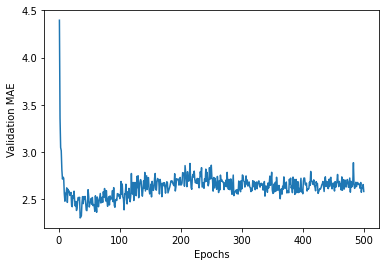

In [62]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

绘制验证分数(删除前10个数据点)

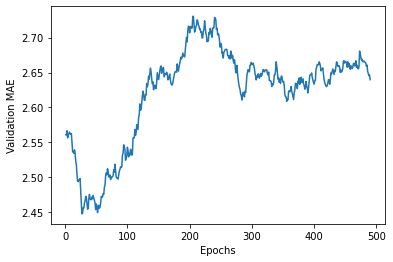

In [63]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [64]:
model = build_model()
model.fit(train_data, train_target, epochs=80, batch_size=16)
test_mse_score, test_mae_score = model.evaluate(test_data, test_target)

Epoch 1/80
26/26 [==============================] - 0s 1ms/step - loss: 558.2827 - mae: 21.6713
Epoch 2/80
26/26 [==============================] - 0s 5ms/step - loss: 407.2818 - mae: 17.7930
Epoch 3/80
26/26 [==============================] - 0s 2ms/step - loss: 244.6983 - mae: 13.0202
Epoch 4/80
26/26 [==============================] - 0s 2ms/step - loss: 118.9001 - mae: 7.7897
Epoch 5/80
26/26 [==============================] - 0s 2ms/step - loss: 55.7539 - mae: 5.2553
Epoch 6/80
26/26 [==============================] - 0s 2ms/step - loss: 38.8255 - mae: 4.3917
Epoch 7/80
26/26 [==============================] - 0s 3ms/step - loss: 35.0852 - mae: 4.0018
Epoch 8/80
26/26 [==============================] - 0s 3ms/step - loss: 23.2054 - mae: 3.4288
Epoch 9/80
26/26 [==============================] - 0s 2ms/step - loss: 19.9502 - mae: 3.1812
Epoch 10/80
26/26 [==============================] - 0s 2ms/step - loss: 19.6617 - mae: 3.0938
Epoch 11/80
26/26 [==============================] -

# 小结
1. 回归常用的损失函数是mse(均方误差(MSE))，分类一般都用categorical_crossentropy
2. 回归问题的评估指标是平均绝对误差(MAE)，分类一般都用accuracy
3. 如果输入数据的特征具有不同的取值范围，应该先进行预处理，对每个特征单独进行缩放
4. 如果可用数据很少，使用K折评估模型以及降低模型复杂度避免过拟合